In [1]:
pip install ludwig

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 449 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 141 kB 65.1 MB/s 
     |████████████████████████████████| 1.0 MB 67.4 MB/s 
     |████████████████████████████████| 4.7 MB 55.1 MB/s 
     |████████████████████████████████| 80 kB 7.7 MB/s 
     |████████████████████████████████| 409 kB 68.1 MB/s 
     |████████████████████████████████| 6.6 MB 46.5 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 101 kB 14.6 MB/s 
  Created wheel for ludwig: filename=ludwig-0.5.4-py3-none-any.whl size=578678 sha256=50ea5997cea83aa83f9fba75bd7e15eddb746da186f9d40c900043353d978b3c
  Stored in directory: /root/.cache/pip/wheels/b3/4d/a0/c3482a59255acbe1df782a76ae43429e44b154b3e9fd83d47

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import logging
from ludwig.api import LudwigModel

In [2]:
df = pd.read_csv(r'C:\Users\himgoyal.ext\Desktop\MY DRIVE\AutoML\Experiment\New_Data\hotel_bookings_New.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,False,203,2016,December,49,2,2,5,2,...,4,No Deposit,250.0,NaN,0,Transient,66.80,0,0,12/9/2016
1,City Hotel,True,82,2015,July,29,16,0,3,2,...,0,No Deposit,9.0,NaN,0,Transient,76.50,0,0,7/16/2015
2,City Hotel,False,25,2016,December,53,27,0,3,3,...,2,No Deposit,220.0,NaN,0,Transient-Party,60.00,0,1,12/30/2016
3,City Hotel,False,1,2016,March,11,9,0,1,1,...,0,No Deposit,9.0,NaN,0,Transient-Party,95.00,0,0,3/10/2016
4,City Hotel,False,70,2017,April,16,16,2,2,2,...,0,No Deposit,9.0,NaN,0,Transient,108.00,0,0,4/20/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,2,2016,July,28,8,0,1,2,...,1,No Deposit,NaN,40.0,0,Transient,77.00,1,0,7/9/2016
119386,City Hotel,False,91,2017,April,16,20,2,3,2,...,0,No Deposit,9.0,NaN,0,Transient,135.00,0,0,4/25/2017
119387,City Hotel,False,74,2016,December,53,27,0,3,3,...,0,No Deposit,22.0,NaN,0,Transient,92.65,0,0,12/30/2016
119388,Resort Hotel,True,130,2015,August,31,1,2,5,2,...,0,No Deposit,240.0,NaN,0,Transient,120.60,0,2,5/19/2015


In [3]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [4]:
df = df.drop(['reservation_status_date'], axis=1)

In [5]:
config = {
 'input_features': [{'name': 'lead_time', 'type': 'number'},
                    {'name': 'arrival_date_week_number', 'type': 'number'},
                    {'name': 'arrival_date_day_of_month', 'type': 'number'},
                    {'name': 'stays_in_weekend_nights', 'type': 'number'},
                    {'name': 'stays_in_week_nights', 'type': 'number'},
                    {'name': 'adults', 'type': 'number'},
                    {'name': 'children', 'type': 'number'},
                    {'name': 'babies', 'type': 'number'},
                    {'name': 'previous_cancellations', 'type': 'number'},
                    {'name': 'previous_bookings_not_canceled', 'type': 'number'},
                    {'name': 'booking_changes', 'type': 'number'},
                    {'name': 'agent', 'type': 'number'},
                    {'name': 'company', 'type': 'number'},
                    {'name': 'days_in_waiting_list', 'type': 'number'},
                    {'name': 'adr', 'type': 'number'},
                    {'name': 'required_car_parking_spaces', 'type': 'number'},
                    {'name': 'total_of_special_requests', 'type': 'number'},
                    {'name': 'hotel', 'type': 'category'},
                    {'name': 'arrival_date_month', 'type': 'category'},
                    {'name': 'arrival_date_year', 'type': 'category'},
                    {'name': 'meal', 'type': 'category'},
                    {'name': 'country', 'type': 'category'},
                    {'name': 'market_segment', 'type': 'category'},
                    {'name': 'distribution_channel', 'type': 'category'},
                    {'name': 'is_repeated_guest', 'type': 'binary'},
                    {'name': 'reserved_room_type', 'type': 'category'},
                    {'name': 'assigned_room_type', 'type': 'category'},
                    {'name': 'deposit_type', 'type': 'category'},
                    {'name': 'customer_type', 'type': 'category'}],

 'output_features': [{'name': 'is_canceled', 'type': 'binary'}]
 }

# instantiate Ludwig model object
model = LudwigModel(config=config, logging_level=logging.INFO)


ray.init() failed: Could not find any running Ray instance. Please specify the one to connect to by setting `--address` flag or `RAY_ADDRESS` environment variable.


In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_stats, preprocessed_data, output_directory = model.train(training_set=train_df, test_set=test_df)
# results = model.train(dataset=df)


╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ api_experiment                                                                                                    │
├──────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                                                               │
├──────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ C:\Users\himgoyal.ext\Desktop\MY DRIVE\AutoML\Experiment\results\api_experiment_run                               │
├──────────────────┼───────────────────────────────────────────────────────────────────────────


╒═══════════════╕
│ PREPROCESSING │
╘═══════════════╛

Using training dataframe
Building dataset (it may take a while)
Building dataset: DONE
Writing preprocessed training set cache
Writing preprocessed test set cache
Writing train set metadata

Dataset sizes:
╒═══════════╤════════╕
│ Dataset   │   Size │
╞═══════════╪════════╡
│ Training  │  95512 │
├───────────┼────────┤
│ Test      │  23878 │
╘═══════════╧════════╛

╒═══════╕
│ MODEL │
╘═══════╛

Warnings and other logs:
  embedding_size (50) is greater than vocab_size (3). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (13). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (4). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (6). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (9). Setting embedding size to be equal to vocab_size.

Training:   8%|█████▎                                                            | 5971/74700 [00:58<06:54, 165.65it/s]
Running evaluation for step: 5976, epoch: 7
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 310.37it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3810 │    0.8954 │     0.8168 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3778 │    0.8973 │     0.8178 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3810 │
├────────────┼────────┤
│ test       │ 0.3778 │
╘════════════╧════════╛
Training:   9%|█████▉                                                            | 6716/74700 [01:06<06:49, 165.94it/s]
Running evaluation for step: 6723, epoch: 8
Evaluation test : 10

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3833 │
├────────────┼────────┤
│ test       │ 0.3821 │
╘════════════╧════════╛
Training:  17%|███████████                                                      | 12691/74700 [02:07<06:25, 161.04it/s]
Running evaluation for step: 12699, epoch: 16
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 331.54it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3843 │    0.8961 │     0.8161 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3827 │    0.8972 │     0.8201 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3843 │
├────────────┼────────┤
│ test       │ 0.3827 │
╘════════════╧════════╛
Training:  18%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3804 │
├────────────┼────────┤
│ test       │ 0.3768 │
╘════════════╧════════╛
Training:  26%|████████████████▉                                                | 19422/74700 [03:15<05:30, 167.13it/s]
Running evaluation for step: 19422, epoch: 25
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 316.37it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3790 │    0.8975 │     0.8160 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3765 │    0.8990 │     0.8183 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3790 │
├────────────┼────────┤
│ test       │ 0.3765 │
╘════════════╧════════╛
Training:  27%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3792 │
├────────────┼────────┤
│ test       │ 0.3775 │
╘════════════╧════════╛
Training:  35%|██████████████████████▋                                          | 26133/74700 [04:23<04:54, 164.84it/s]
Running evaluation for step: 26145, epoch: 34
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 338.49it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3832 │    0.8971 │     0.8128 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3810 │    0.8984 │     0.8136 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3832 │
├────────────┼────────┤
│ test       │ 0.3810 │
╘════════════╧════════╛
Training:  36%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3778 │
├────────────┼────────┤
│ test       │ 0.3757 │
╘════════════╧════════╛
Training:  44%|████████████████████████████▌                                    | 32853/74700 [05:30<04:29, 155.42it/s]
Running evaluation for step: 32868, epoch: 43
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 299.63it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3779 │    0.8982 │     0.8205 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3764 │    0.8993 │     0.8228 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3779 │
├────────────┼────────┤
│ test       │ 0.3764 │
╘════════════╧════════╛
Training:  45%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3808 │
├────────────┼────────┤
│ test       │ 0.3786 │
╘════════════╧════════╛
Training:  53%|██████████████████████████████████▍                              | 39578/74700 [06:40<03:29, 167.89it/s]
Running evaluation for step: 39591, epoch: 52
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 298.04it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3868 │    0.8955 │     0.8154 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3859 │    0.8963 │     0.8190 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3868 │
├────────────┼────────┤
│ test       │ 0.3859 │
╘════════════╧════════╛
Training:  54%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3781 │
├────────────┼────────┤
│ test       │ 0.3762 │
╘════════════╧════════╛
Training:  62%|████████████████████████████████████████▎                        | 46298/74700 [07:53<02:44, 172.55it/s]
Running evaluation for step: 46314, epoch: 61
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 277.40it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3778 │    0.8981 │     0.8172 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3763 │    0.8992 │     0.8196 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3778 │
├────────────┼────────┤
│ test       │ 0.3763 │
╘════════════╧════════╛
Training:  63%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3778 │
├────────────┼────────┤
│ test       │ 0.3757 │
╘════════════╧════════╛
Training:  71%|██████████████████████████████████████████████▏                  | 53033/74700 [09:08<02:17, 157.19it/s]
Running evaluation for step: 53037, epoch: 70
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 237.25it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3769 │    0.8982 │     0.8188 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3757 │    0.8992 │     0.8228 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3769 │
├────────────┼────────┤
│ test       │ 0.3757 │
╘════════════╧════════╛
Training:  72%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3826 │
├────────────┼────────┤
│ test       │ 0.3811 │
╘════════════╧════════╛
Training:  80%|███████████████████████████████████████████████████▉             | 59751/74700 [10:23<01:42, 146.00it/s]
Running evaluation for step: 59760, epoch: 79
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 262.65it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3826 │    0.8965 │     0.8168 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3818 │    0.8975 │     0.8212 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3826 │
├────────────┼────────┤
│ test       │ 0.3818 │
╘════════════╧════════╛
Training:  81%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3803 │
├────────────┼────────┤
│ test       │ 0.3800 │
╘════════════╧════════╛
Training:  89%|█████████████████████████████████████████████████████████▊       | 66482/74700 [11:39<00:50, 162.27it/s]
Running evaluation for step: 66483, epoch: 88
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 279.64it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3779 │    0.8975 │     0.8176 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3770 │    0.8982 │     0.8193 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3779 │
├────────────┼────────┤
│ test       │ 0.3770 │
╘════════════╧════════╛
Training:  90%

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3789 │
├────────────┼────────┤
│ test       │ 0.3771 │
╘════════════╧════════╛
Training:  98%|███████████████████████████████████████████████████████████████▋ | 73195/74700 [12:52<00:09, 165.57it/s]
Running evaluation for step: 73206, epoch: 97
Evaluation test : 100%|█████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 267.17it/s]
╒═══════════════╤════════╤═══════════╤════════════╕
│ is_canceled   │   loss │   roc_auc │   accuracy │
╞═══════════════╪════════╪═══════════╪════════════╡
│ train         │ 0.3802 │    0.8977 │     0.8187 │
├───────────────┼────────┼───────────┼────────────┤
│ test          │ 0.3791 │    0.8987 │     0.8228 │
╘═══════════════╧════════╧═══════════╧════════════╛
╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.3802 │
├────────────┼────────┤
│ test       │ 0.3791 │
╘════════════╧════════╛
Training:  99%

In [9]:
# Generates predictions and performance statistics for the train set.
train_stats, predictions_train, output_directory = model.evaluate(
  train_df,
  collect_predictions=True,
  collect_overall_stats=True,
  skip_save_eval_stats=False,
  skip_save_predictions=False,
  output_directory="train_results",
  return_type="dict"
)

Evaluation: 100%|███████████████████████████████████████████████████████████████████| 747/747 [00:02<00:00, 293.56it/s]

===== is_canceled =====
accuracy: 0.8125889897346497
average_precision_macro: 0.8567346656403461
average_precision_micro: 0.8567346656403461
average_precision_samples: 0.8567346656403461
loss: 0.3901185393333435
overall_stats: { 'avg_f1_score_macro': 0.7991245319788391,
  'avg_f1_score_micro': 0.8125889940531034,
  'avg_f1_score_weighted': 0.8125813710156947,
  'avg_precision_macro': 0.7991488864466778,
  'avg_precision_micro': 0.8125889940531033,
  'avg_precision_weighted': 0.8125889940531033,
  'avg_recall_macro': 0.7991002182760233,
  'avg_recall_micro': 0.8125889940531033,
  'avg_recall_weighted': 0.8125889940531033,
  'kappa_score': 0.5982490732095349,
  'token_accuracy': 0.8125889940531033}
per_class_stats: {False: {   'accuracy': 0.8125889940531033,
    'f1_score': 0.8511310711909514,
    'fall_out': 0.25302974660301136,
    'false_discovery_rate': 0.148968017

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



roc_auc: 0.8946034908294678
roc_auc_macro: 0.8945860624223487
roc_auc_micro: 0.8945860624223487
Saved to: train_results


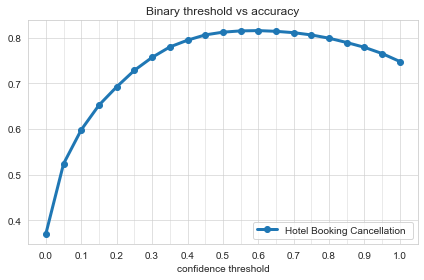

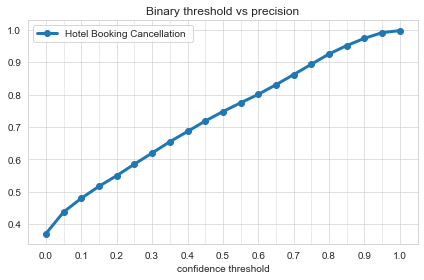

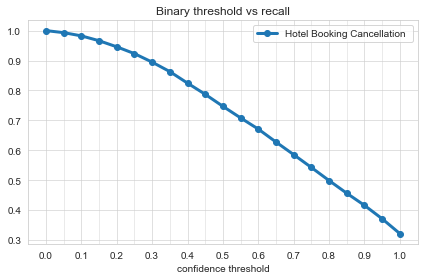

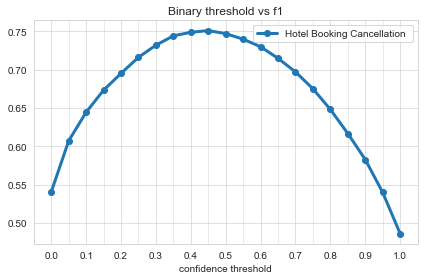

In [10]:
from ludwig.visualize import binary_threshold_vs_metric

binary_threshold_vs_metric(
    [predictions_train["is_canceled"]["probabilities"]],
    train_df["is_canceled"],
    preprocessed_data[-1],
    "is_canceled",
    ["accuracy", "precision", "recall", "f1"],
    1,
    model_names=["Hotel Booking Cancellation"],
    output_directory="visualization",
    file_format="png",
)

In [11]:
# Generates predictions and performance statistics for the test set.
test_stats, predictions_test, output_directory = model.evaluate(
  test_df,
  collect_predictions=True,
  collect_overall_stats=True,
  skip_save_eval_stats=False,
  skip_save_predictions=False,
  output_directory="test_results",
  return_type="dict"
)

Evaluation: 100%|███████████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 373.66it/s]

===== is_canceled =====
accuracy: 0.8169444799423218
average_precision_macro: 0.8570814297819391
average_precision_micro: 0.8570814297819391
average_precision_samples: 0.8570814297819391
loss: 0.38987404108047485
overall_stats: { 'avg_f1_score_macro': 0.8034667286183665,
  'avg_f1_score_micro': 0.8169444677108636,
  'avg_f1_score_weighted': 0.8168905826193377,
  'avg_precision_macro': 0.8036464400270111,
  'avg_precision_micro': 0.8169444677108636,
  'avg_precision_weighted': 0.8169444677108636,
  'avg_recall_macro': 0.8032891187680771,
  'avg_recall_micro': 0.8169444677108636,
  'avg_recall_weighted': 0.8169444677108636,
  'kappa_score': 0.6069339198338416,
  'token_accuracy': 0.8169444677108636}
per_class_stats: {False: {   'accuracy': 0.8169444677108636,
    'f1_score': 0.8549334572367331,
    'fall_out': 0.24906515580736543,
    'false_discovery_rate': 0.14577530

roc_auc: 0.8953573107719421
roc_auc_macro: 0.8953304744388524
roc_auc_micro: 0.8953304744388524
Saved to: test_results


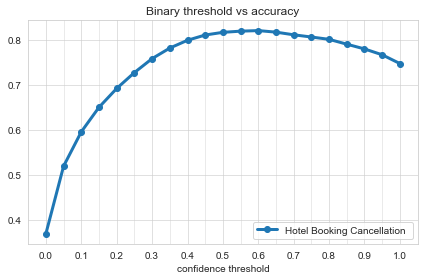

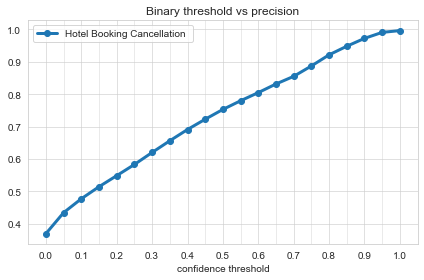

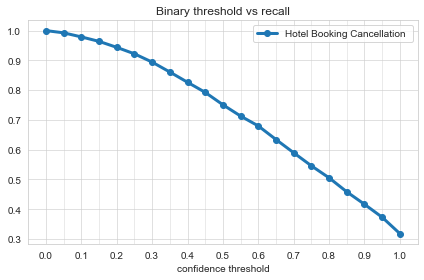

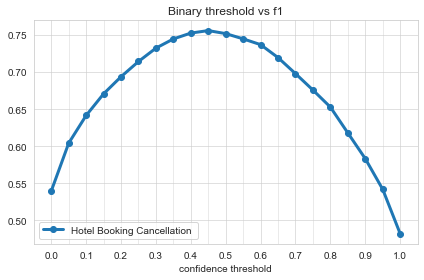

In [12]:
from ludwig.visualize import binary_threshold_vs_metric

binary_threshold_vs_metric(
    [predictions_test["is_canceled"]["probabilities"]],
    test_df["is_canceled"],
    preprocessed_data[-1],
    "is_canceled",
    ["accuracy", "precision", "recall", "f1"],
    1,
    model_names=["Hotel Booking Cancellation"],
    output_directory="visualization",
    file_format="png",
)

In [ ]:
# predictions_train, prediction_results_train = model.predict(dataset=train_df, skip_save_predictions=False, output_directory="predictions_results_train")


In [ ]:
# predictions_test, prediction_results_train = model.predict(dataset=test_df, skip_save_predictions=False, output_directory="predictions_results_test")
